# Week 5: Exploratory Data Analysis - Practice Exercise (Solution)

### About the dataset (Customer Tip Data)

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

Attribute Information:

**total_bill:** Total bill (cost of the meal), including tax, in US dollars

**tip:** Tip in US dollars

**sex:** Sex of person paying for the meal

**smoker:** There is a smoker in a group or not

**day:** Day on which the order is served

**time:** Time of the order

**size:** Size of the group

**Import the required libraries**

In [1]:
# import pandas
import pandas as pd

# import numpy
import numpy as np

# import matplotlib.pyplot
import matplotlib.pyplot as plt

# import seaborn 
import seaborn as sns

# to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

#### Load the customer tip dataset and print the first five observations

In [2]:
# load the csv file
df_tips = pd.read_csv('customer_tip.csv')

# display the first five observations
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Let's begin with some hands-on practice exercises

#### 1. Make a list of categorical and numerical variables in the data

In [ ]:
# use list comprehension to create the lists
# 'select_dtypes' selects the variable of given data type 
num_var = [var for var in df_tips.select_dtypes(include=np.number)]
print('Numerical Variables:', num_var)

cat_var = [var for var in df_tips.select_dtypes(include=object)]
print('Categorical Variables:', cat_var)

Numerical Variables: ['total_bill', 'tip', 'size']
Categorical Variables: ['sex', 'smoker', 'day', 'time']


#### 2. Compute the average bill amount for each day

In [ ]:
# compute the average bill amount for each day using groupby()
avg_bill = df_tips.groupby(['day'])['total_bill'].mean()

print('Average Bill Amount for Each Day:', avg_bill)

Average Bill Amount for Each Day: day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64


On Sunday the average bill is highest. There is not much difference in the average bill amount for Saturday and Sunday. Also, the average bill amount on Thursday and Friday is nearly the same.

#### 3. Which gender is more generous in giving the tip? 

In [ ]:
# compute average tip for each gender
df_tips.groupby(['sex'])['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

From the above output, we can infer that males are giving slightly higher tip amount than females. 

#### 4. According to the data, were there more customers for dinner or lunch?

In [ ]:
# find the mode of the variable 'time'
df_tips.time.mode()

0    Dinner
dtype: object

The output shows that there were more customers for dinner.

#### 5. Based on the statistical summary, comment on the variable 'tip'

In [ ]:
# describe() function returns the statistical summary of the data
df_tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

There are 244 tip amount records in the data; where the average tip amount is nearly 3 US dollars. The statistical summary shows that the variable is positively skewed, as 75% of the amounts are less than 3.5 US dollars.

#### 6. Find the busiest day in terms of the orders

In [ ]:
# value_counts() returns the number of observations for each category
df_tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

The output shows that Saturday is the busiest day, as the count for orders is highest.

#### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness

In [ ]:
# skew() returns the coefficient of skewness
df_tips.total_bill.skew()

1.1332130376158205

The value for skewness is positive.

#### 8. Is the tip amount dependent on the total bill?

In [ ]:
# corr() returns the correlation between numeric variables
df_tips[['total_bill', 'tip']].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


There is a moderate positive correlation between the tip amount and the total bill. We may say that the customers tend to give tip based on their order bill amount.

#### 9. What is the percentage of males and females in the dataset? and display it in the plot

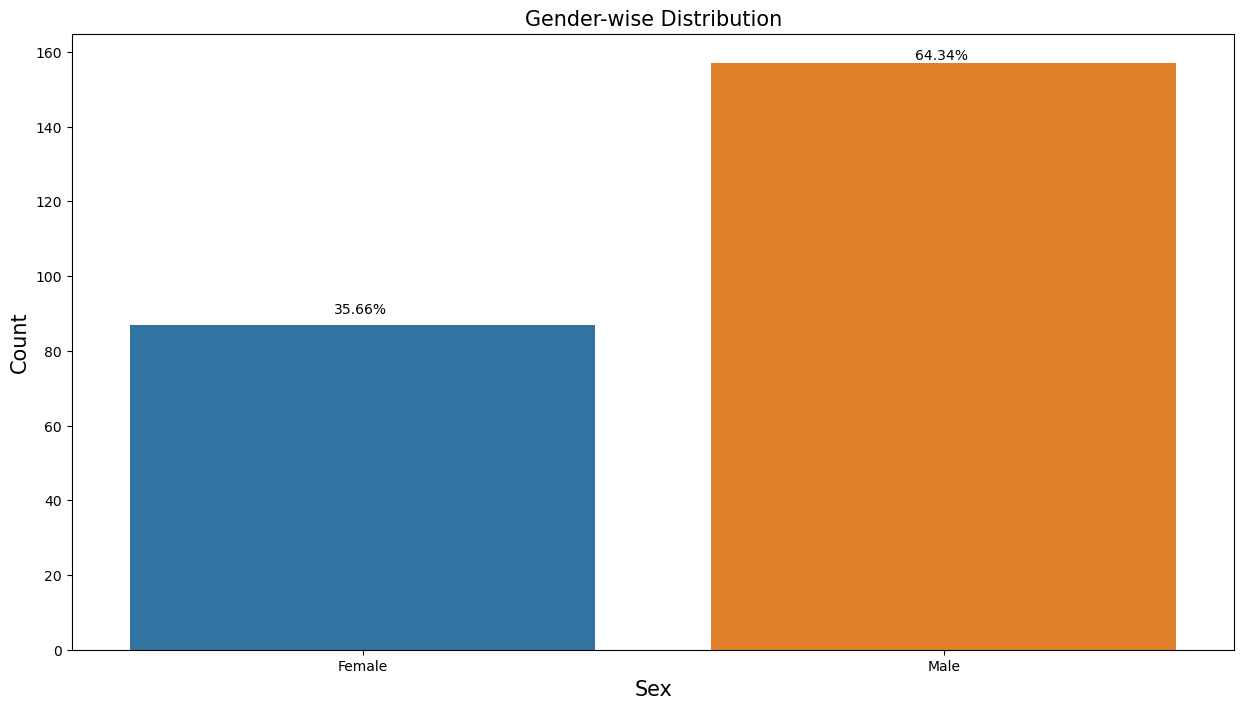

In [3]:
# set the plot size
plt.figure(figsize = (15,8))

# countplot() returns the number of observations for each category
sns.countplot(x = 'sex', data = df_tips)

# add percentage values on a plot
# x and y are positions for text on axes
# 's' is the text to display
plt.text(x = -0.05, y = 90, s = str(round((df_tips.sex.value_counts()[1]/len(df_tips.sex)*100),2)) +'%')
plt.text(x = 0.95, y = 158, s = str(round((df_tips.sex.value_counts()[0]/len(df_tips.sex)*100),2))+'%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Gender-wise Distribution', fontsize = 15)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

The above plot shows that there are 35.66% females and 64.34% males in the data. 

#### 10. Is there any relationship between tip and total bill amount? Support your answer with a plot

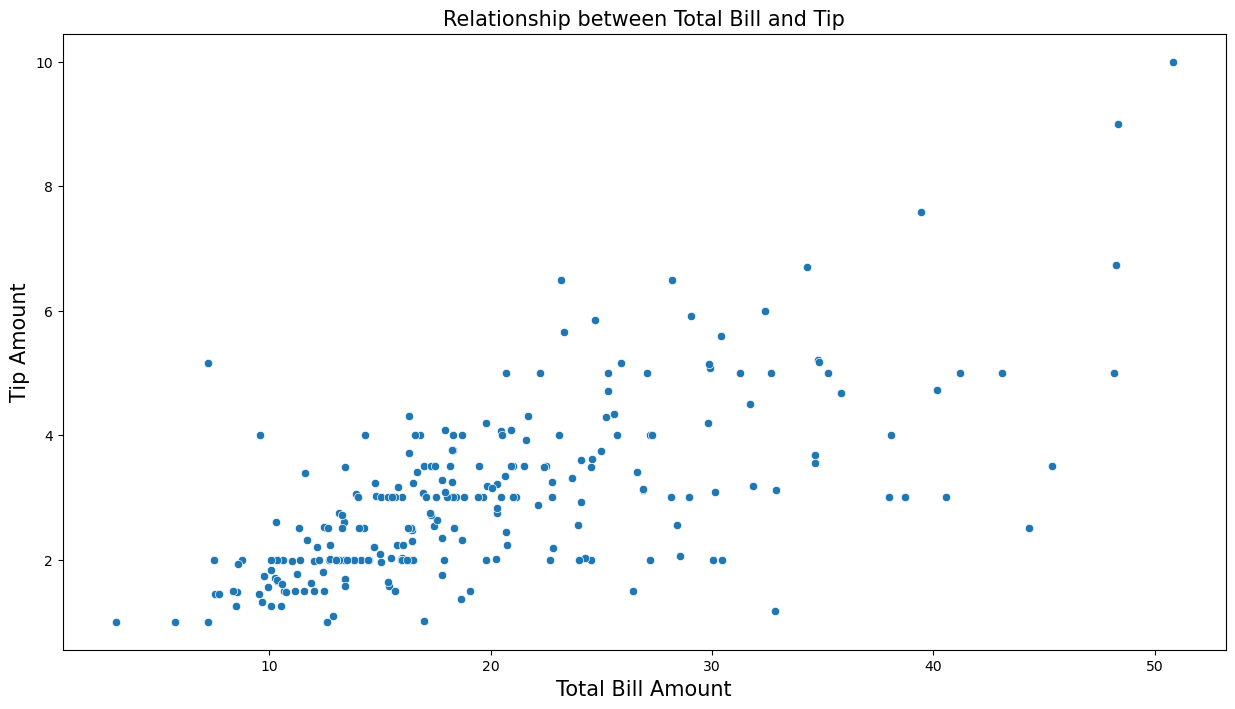

In [4]:
# set the plot size
plt.figure(figsize = (15,8))

# plot scatter plot for 'total_bill' and 'tip' to check the relationship
sns.scatterplot(x = 'total_bill', y = 'tip', data = df_tips)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Relationship between Total Bill and Tip', fontsize = 15)
plt.xlabel('Total Bill Amount', fontsize = 15)
plt.ylabel('Tip Amount', fontsize = 15)

# display the plot 
plt.show()

The plot shows that there is a positive relationship between the total bill amount and the tip. The highest tip given  was approximately 10 dollars. A large proportion of observations are clustered where total_bill is between 10 to 20 dollars and the tip is between 1 to 4 dollars.

#### 11. Which is the busiest day and time at the restaurant?

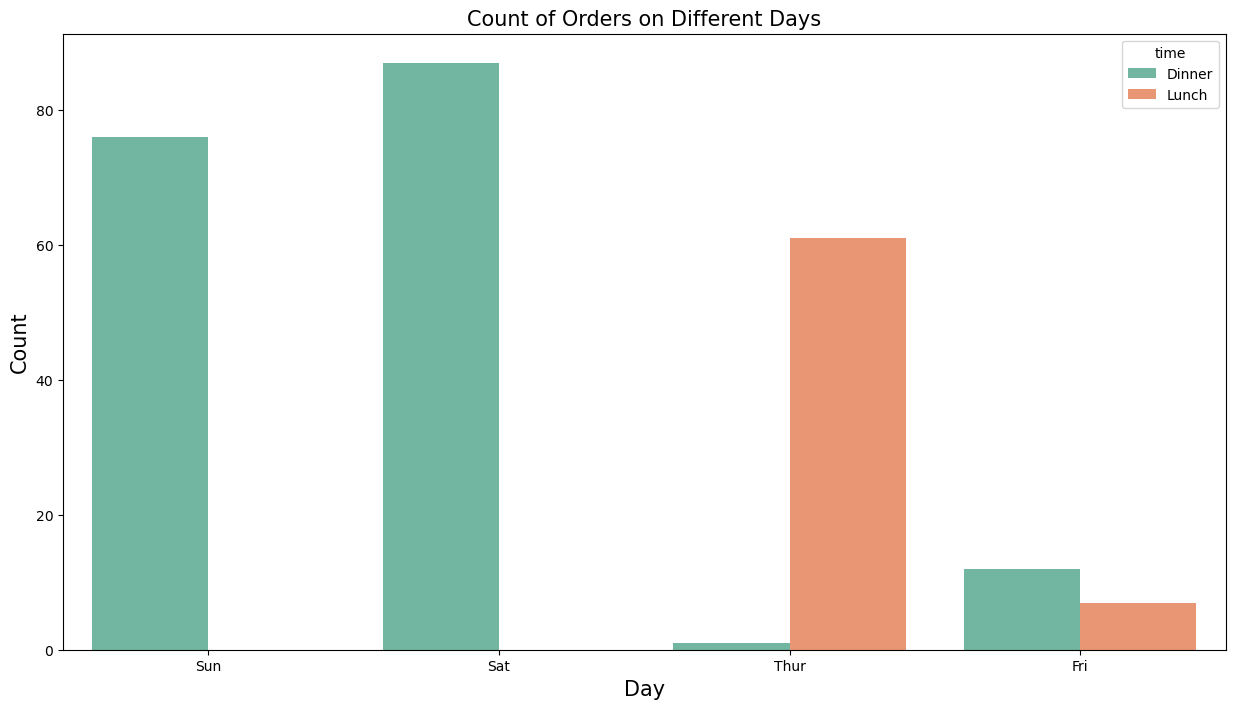

In [5]:
# set the plot size
plt.figure(figsize = (15,8))

# 'hue = time' returns the count for different categories of time 
# set colors using 'palette'
sns.countplot(x = 'day', hue = 'time', data = df_tips, palette = 'Set2')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count of Orders on Different Days', fontsize = 15)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# display the plot
plt.show()

Saturday evening is the busiest time according to the data. All the orders accepted on Saturday and Sunday are for dinner. While, on Thursday there is a high proportion of lunch orders among all days.

#### 12. Compute the gender-wise count based on smoking habits

In [6]:
# create a cross table for smoking habits and gender
# 'index' represents the variable on rows
# 'columns' represents the variable on columns
pd.crosstab(index = df_tips.smoker, columns = df_tips.sex)

sex,Female,Male
smoker,,
No,54,97
Yes,33,60


The count of non-smokers is high for both males and females. The crosstab showing the relationship between two categorical variables is known as, 'contingency table'.

#### 13. Compare the tip amount given for different days

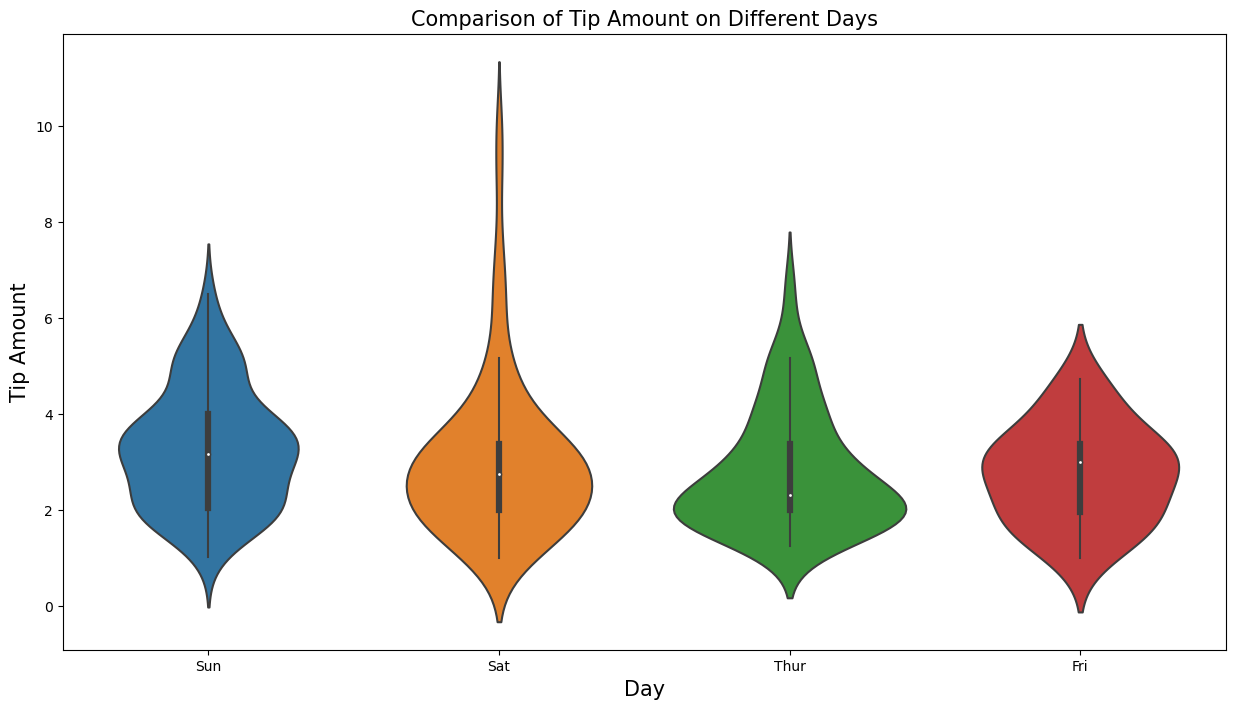

In [7]:
# set the plot size
plt.figure(figsize = (15,8))

# plot a violinplot
sns.violinplot(x = 'day', y = 'tip', data = df_tips)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Comparison of Tip Amount on Different Days', fontsize = 15)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Tip Amount', fontsize = 15)

# display the plot
plt.show()

The above violin plot shows the distribution of the tip amount given on different days. The tip is approximately 1 to 5 dollars for all the days. The highest tip was given on Saturday.

#### 14. Is the average bill amount dependent on the size of the group?

In [8]:
# compute average bill for unique size using groupby()
# set plot size using 'figsize'
avg_total_bill = df_tips[['total_bill', 'size']].groupby('size').mean()
avg_total_bill

,total_bill
size,
1,7.242500
2,16.448013
3,23.277632
4,28.613514
5,30.068000
6,34.830000


In [9]:
# store the index of the dataframe avg_total_bill i.e. the unique values of the variable size
size_index = avg_total_bill.index
size_index

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64', name='size')

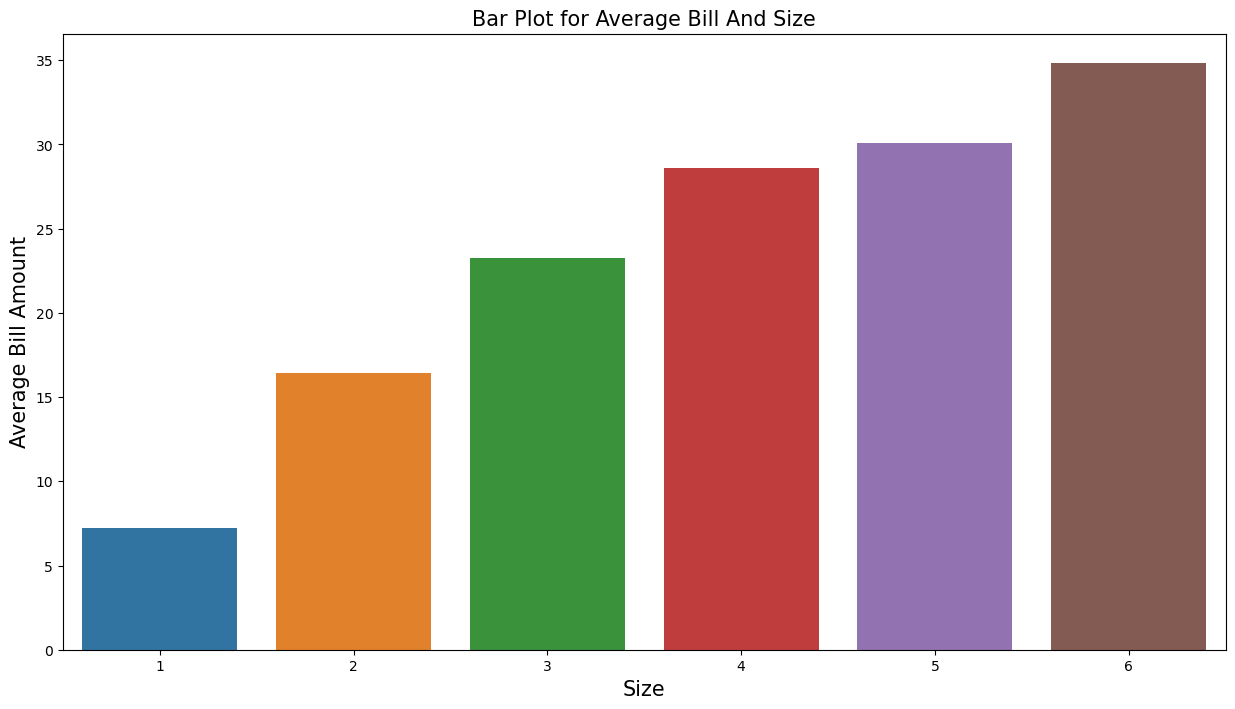

In [10]:
# set the size of the plot
plt.rcParams['figure.figsize'] = 15, 8

# plot a barplot
sns.barplot(x = size_index, y = avg_total_bill['total_bill'])

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Bar Plot for Average Bill And Size', fontsize = 15)
plt.xlabel('Size', fontsize = 15)
plt.ylabel('Average Bill Amount', fontsize = 15)

# display the plot
plt.show()

The average bill amount is increasing with the size.

#### 15. Is the tip amount varying based on gender and time?

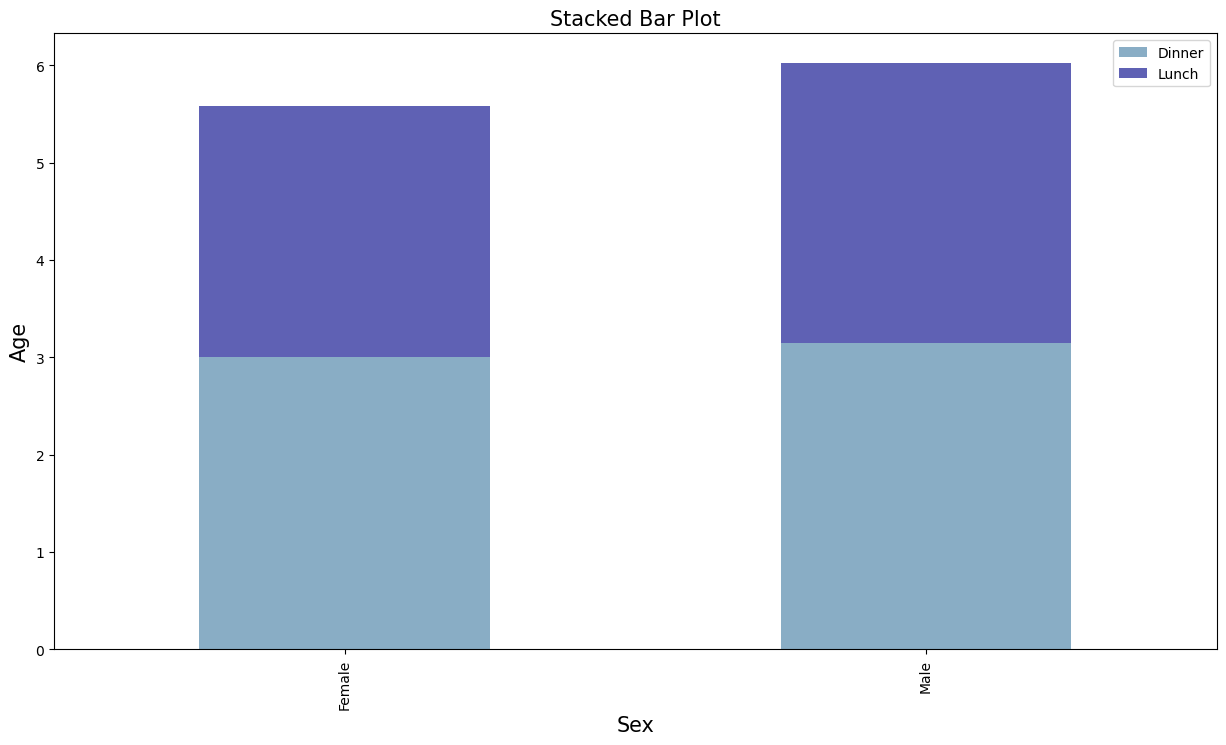

In [11]:
# construct the pivot table to calculate average tip amount for different gender and time
stack = pd.pivot_table(df_tips,index=["sex"], columns=["time"], values='tip', aggfunc='mean')

# set the colors for the plot
color = sns.color_palette("twilight")

# plot the stacked bar graph
# 'stacked=True' retruns the stacked bar plot
# set plot size using 'figsize'
# 'color' assigns colors to the plot 
fig = stack.plot.bar(stacked = True, figsize = (15,8), color = color)

# set axes and plot labels
# set text size using 'fontsize'
plt.title('Stacked Bar Plot', fontsize = 15)
fig.set_xlabel('Sex', fontsize = 15)
fig.set_ylabel('Age', fontsize = 15)

# set the position of legend
fig.legend(loc='upper right')

# display the plot
plt.show()

The stacked bar plot shows that there is no significant difference in the tip given by males and females.

#### 16. Visualize the average bill amount for each day

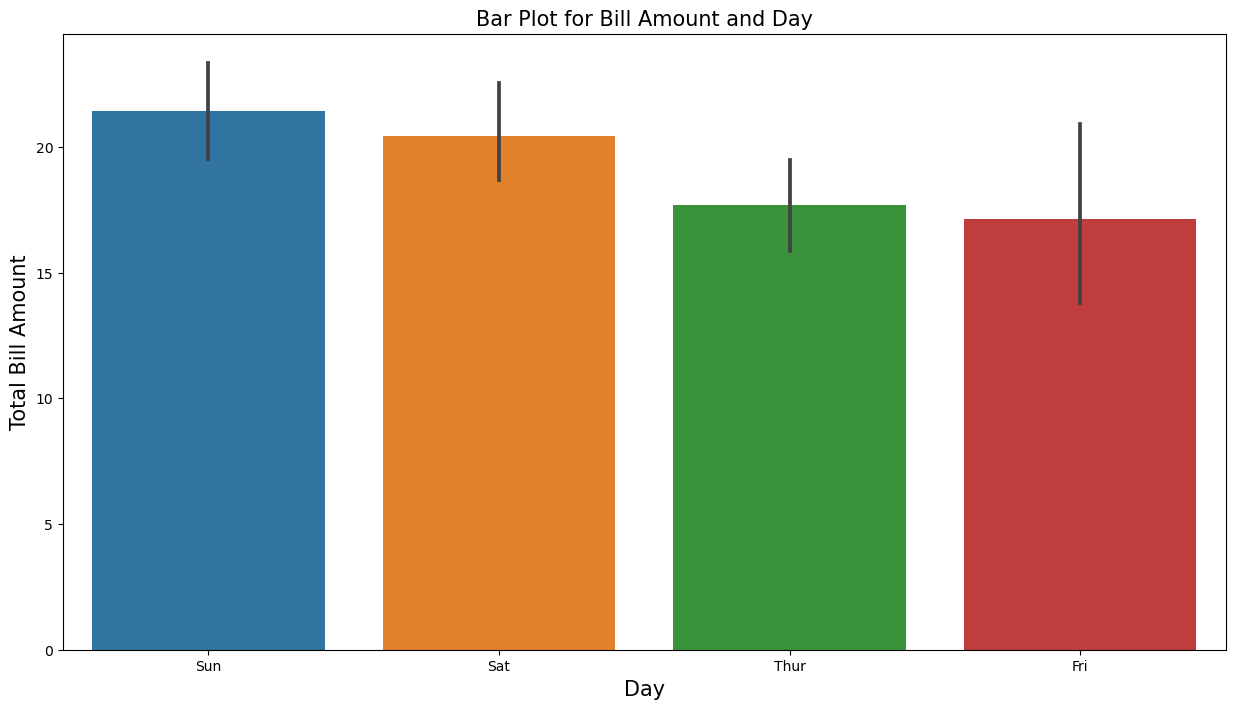

In [12]:
# set the plot size
plt.figure(figsize = (15,8))

# plot a barplot with mean of total bill on y-axis and days on x-axis
sns.barplot(x = 'day', y = 'total_bill', data = df_tips)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Bar Plot for Bill Amount and Day', fontsize = 15)
plt.xlabel('Day', fontsize = 15)
plt.ylabel('Total Bill Amount', fontsize = 15)

# display the plot
plt.show()

The bars show that the average bill is highest on Sunday. The black rectangles on each bar show the estimate of mean value and confidence interval for corresponding data. There is more variability in the bill amount for Friday.

#### 17. Plot a horizontal boxplot to compare the bill amount based on gender

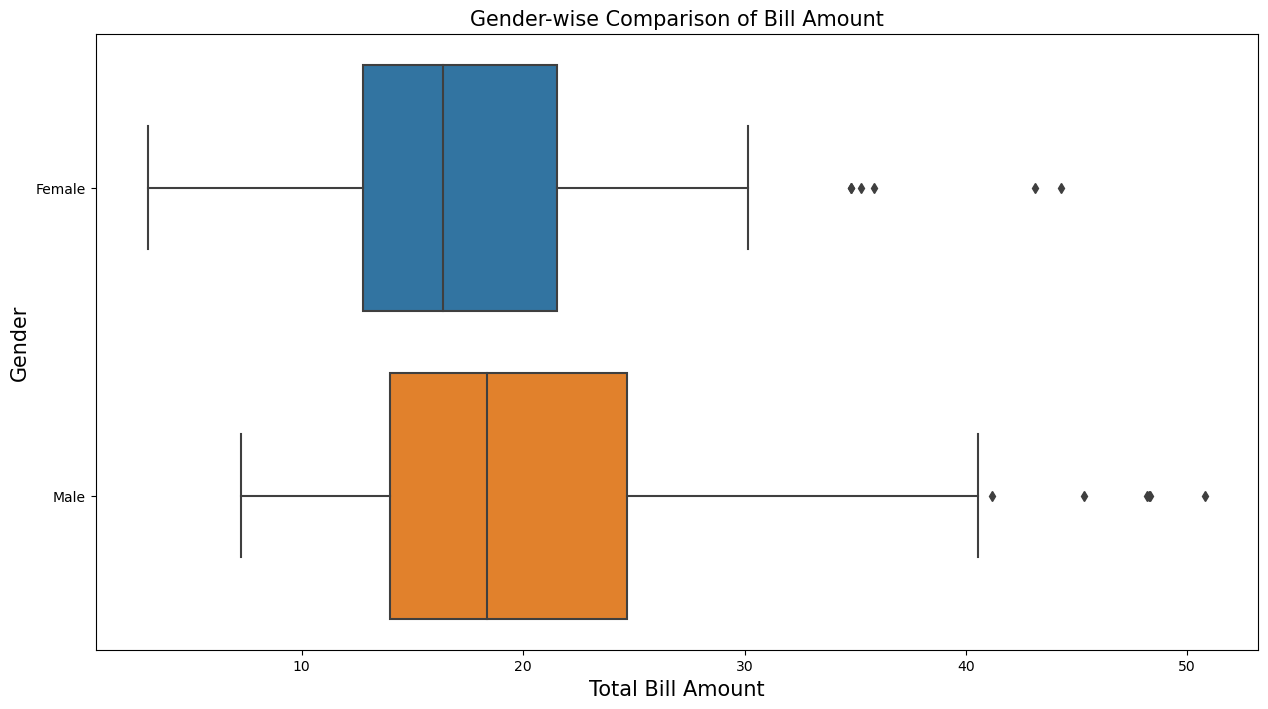

In [14]:
# set the plot size
plt.figure(figsize = (15,8))

# 'orient = h' plots the plot horizontally
# 'y' represents categorical variable on y-azis
# 'x' represents numerical variable on x-azis
sns.boxplot(x = 'total_bill', y = 'sex', data = df_tips, orient='h')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Gender-wise Comparison of Bill Amount', fontsize = 15)
plt.xlabel('Total Bill Amount', fontsize = 15)
plt.ylabel('Gender', fontsize = 15)

# display the plot
plt.show()

The average bill amount for males is slightly higher than females. Also, the outliers are present for both the distributions.

#### 18. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [15]:
# create a subset of dataframe with orders on Saturday and Sunday
df_weekend = df_tips[(df_tips['day'] == 'Sat') | (df_tips['day'] == 'Sun')]

# create a pivot table for maximum bill amount
max_amt =  pd.pivot_table(data = df_weekend, values = 'total_bill', index = 'time', columns = 'day', aggfunc = 'max')

max_amt

day,Sat,Sun
time,,
Dinner,50.81,48.17


From the output, we can see that people prefer to go for dinner on weekends rather than lunch.

## Power Ahead!